1. Data Preparation:
Download and explore the Global Superstore Orders dataset.
Perform basic data cleaning and preprocessing.
- Done


2. Data Visualization with Plotly:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.


3. Data Visualization with Plotnine:
Use Plotnine to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


4. Comparative Analysis:
Compare the insights gained from Plotly and Plotnine visualizations.
Document your observations about the ease of use and effectiveness of both tools.


5. Code and Insights:
Write clear, well-documented Python code.
Include your analysis and insights as comments or markdown cells in your Jupyter notebook.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from plotnine import * 
import plotly.express as px
import datetime 
import plotly.graph_objects as go
from datetime import datetime

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D5/Mini Project/US Superstore data.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.isnull().sum() #to check null values)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.duplicated().sum() 
df.drop_duplicates(inplace=True)

In [7]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df['Postal Code'] = df['Postal Code'].astype(str)
df['Row ID'] = df['Row ID'].astype(str)


In [14]:
df.dtypes

Row ID                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

# Data Visualization with Plotly:


In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group by month
df['Year-Month'] = df['Order Date'].dt.to_period('M')  # Extract year and month
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Convert 'Year-Month' back to string for better readability in plots (optional)
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)


In [25]:
# Create an interactive line chart to show sales trends over the years.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.line(data_frame=monthly_sales, x='Year-Month', y='Sales', title='Sales Over Time by Month')
fig.show()


Sales have seasonality over the years. Peak sales are usually around March or September with some additional months that aid in sales growth in a given year. 

In [30]:
# Build an interactive map to visualize sales distribution by country.
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
fig = px.choropleth(country_sales, 
                    locations='Country', 
                    locationmode='country names',
                    color='Sales',
                    color_continuous_scale='mygbm',
                    title='Sales Distribution by Country')

fig.show()

Distribution only exists in the US.

# Data Visualization with Plotnine


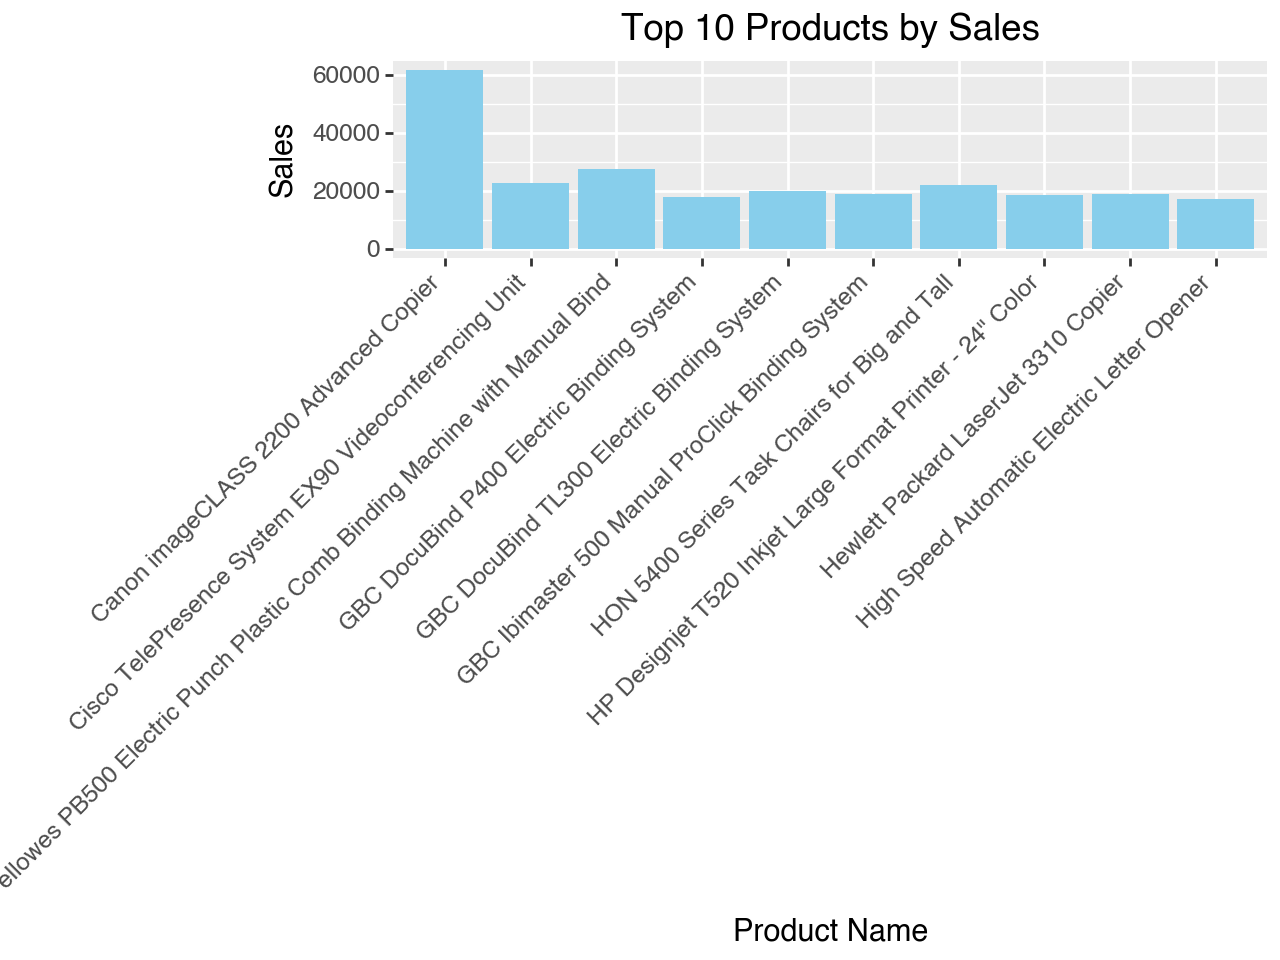

In [ ]:

# Use Plotnine to generate a bar chart showing top 10 products by sales.
from plotnine import ggplot, aes, geom_bar, ggtitle, theme, element_text
import pandas as pd


# Grouping by 'Product Name' and summing the 'Sales' and sorting to get the top 10 products
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

# Create a bar plot using plotnine
plot = (ggplot(product_sales, aes(x='Product Name', y='Sales'))
        + geom_bar(stat='identity', fill='skyblue')  # Use stat='identity' for actual sales values
        + ggtitle('Top 10 Products by Sales') 
        + theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)  
plot.show()


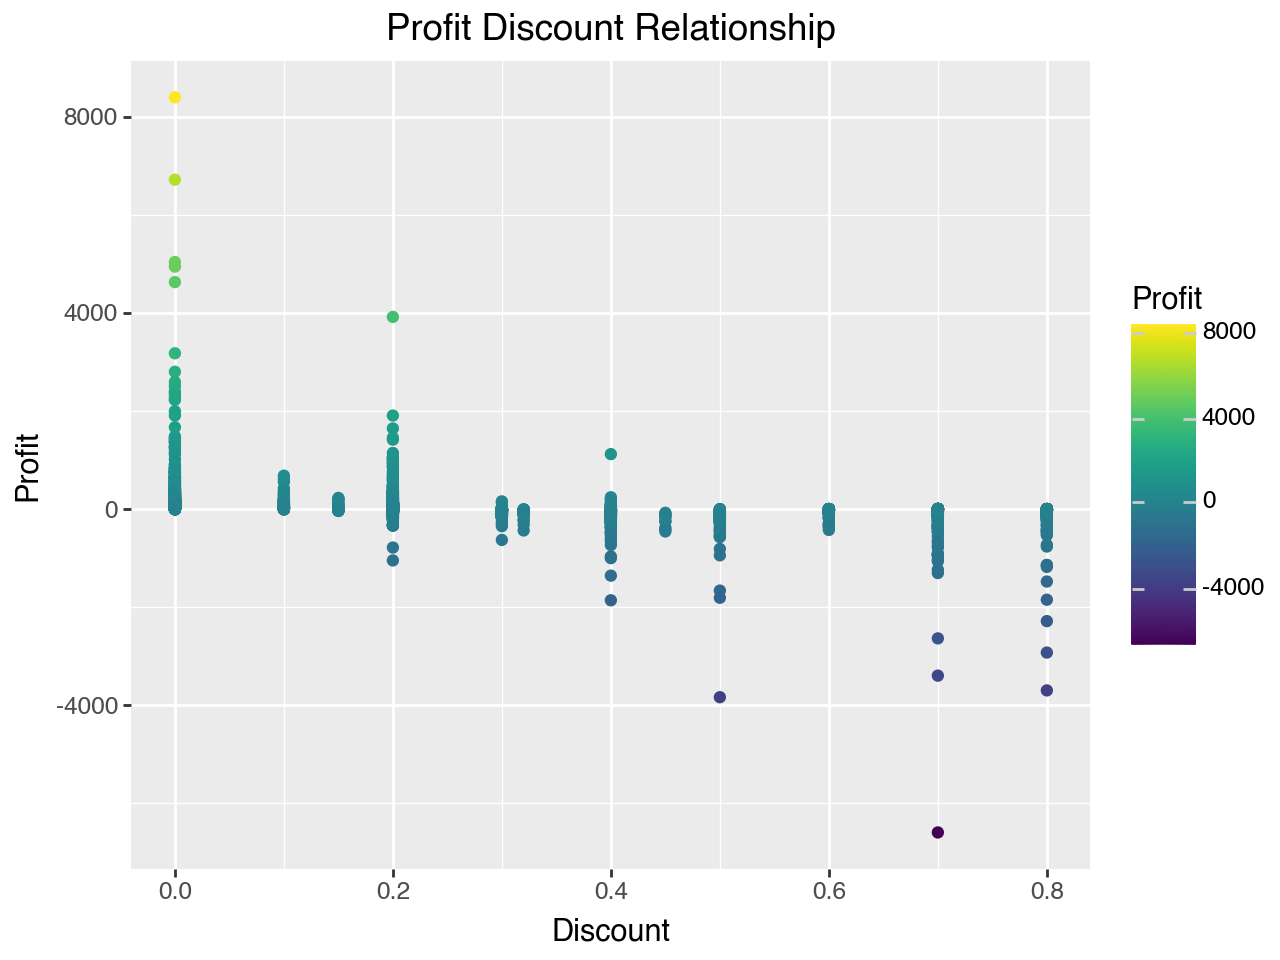

In [52]:
# Create a scatter plot to analyze the relationship between profit and discount.
plot = (ggplot(df, aes(x='Discount', y='Profit', color='Profit'))
        + geom_point()  # Plot scatter points
        + ggtitle('Profit Discount Relationship')  # Plot title
        + xlab('Discount')  # X-axis label
        + ylab('Profit')  # Y-axis label
)
plot.show()

The Higher the discount the less likely the profitability.

# Comparative Analysis:


Compare the insights gained from Plotly and Plotnine visualizations.
Document your observations about the ease of use and effectiveness of both tools.

The interactive capabilities of plotly and readability are in my opion better than plotnine. Additionally the code-ability is much easier for plotly. Observationally, plotly shows more useful data. 